# PITCH,ENERGY AND ZERO CROSSING RATE OF SPEECH SIGNAL

number of sample points:314074


<ipython-input-7-fa57943365f1>:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data=np.fromstring(Str_data,dtype=np.short)


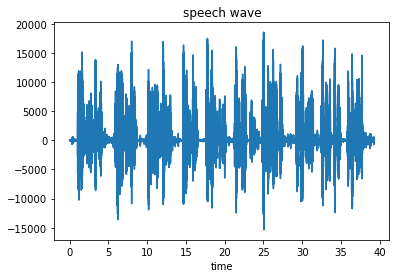

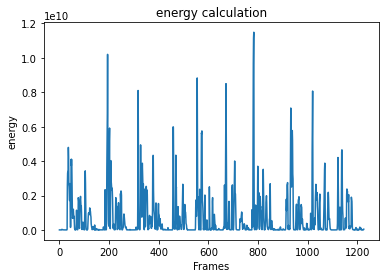

In [7]:
import wave
import numpy as np
import matplotlib.pyplot as plt 
from scipy.io.wavfile import read,write
import math
def calEnergy(wave_data):
    energy=[]
    sum=0
    for i in range(len(wave_data)):
        sum=sum+(int(wave_data[i])*int(wave_data[i]))
        if (i+1)%256 ==0:
            energy.append(sum)
            sum=0
        elif i==len(wave_data)-1:
            energy.append(sum)
    return energy
f=wave.open("C:\\Users\\GF LAB\\img_sp_lab\\dataset\\auds\\sample1.wav","rb")
params=f.getparams()
nchannels,sampwidth,framerate,nframes=params[:4]
Str_data=f.readframes(nframes)
Str_data=np.frombuffer(Str_data,dtype="int16")
f_rate=f.getframerate()
wave_data=np.fromstring(Str_data,dtype=np.short)
print("number of sample points:"+str(len(wave_data)))
time=np.linspace(0,len(Str_data)/f_rate,num=len(Str_data))
plt.figure(1)
plt.title("speech wave")
plt.xlabel("time")
plt.plot(time,Str_data)
plt.show()
energy=calEnergy(wave_data)
plt.figure()
plt.plot(energy)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('energy')
plt.title('energy calculation')
plt.show()
FRAME_SIZE=1024
def ProcessFrame(frame,Fs):
    freq=max(frame)
    return freq


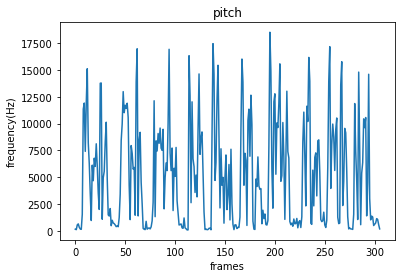

In [5]:
Fs,data=read("C:\\Users\\GF LAB\\img_sp_lab\\dataset\\auds\\sample1.wav")
numFrames=int(len(data)/FRAME_SIZE)
frequencies=np.zeros(numFrames)
for i in range(numFrames):
    frame=data[i*FRAME_SIZE:(i+1)*FRAME_SIZE]
    frequencies[i]=ProcessFrame(frame.astype(float),Fs)
plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('frames')
plt.ylabel('frequency(Hz)')
plt.title('pitch')
plt.show()


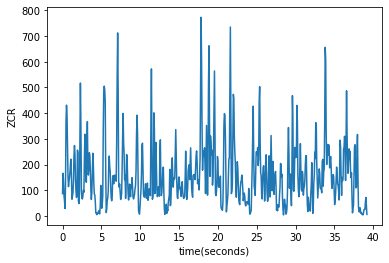

In [15]:
def ZeroCR(waveData,frameSize,overlap):
    wlen=len(waveData)
    step=frameSize-overlap
    frameNum=math.ceil(wlen/step)
    zcr=np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame=waveData[np.arange(i*step,min(i*step+frameSize,wlen))]
        curFrame=curFrame-np.mean(curFrame)
        zcr[i]=sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr
overlap=512
wave_data.shape=-1,1
zcr=ZeroCR(wave_data,FRAME_SIZE,overlap)
time2=np.arange(0,len(zcr))*(len(wave_data)/len(zcr)/f_rate)
plt.plot(time2,zcr)
plt.ylabel('ZCR')
plt.xlabel('time(seconds)')
plt.show()
f.close()